## Redução de Dimensionalidade

In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets

wine = datasets.load_wine()
X = wine.data
y = wine.target

In [2]:
import pandas as pd

df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

Acurácia nos dados originais: 0.7796610169491526


In [4]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print('Número original de atributos:', X_train.shape[1])
print('Número reduzido de atributos:', X_test_pca.shape[1])

Número original de atributos: 13
Número reduzido de atributos: 3


In [5]:
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

Acurácia nos dados originais: 0.7288135593220338


In [6]:
# procurando quantidade de atributos ideais
for n in range(1,14):

    pca = PCA(n_components=n)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=1)

    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    print('Components: ', n, '- Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

Components:  1 - Acurácia nos dados originais: 0.6949152542372882
Components:  2 - Acurácia nos dados originais: 0.711864406779661
Components:  3 - Acurácia nos dados originais: 0.7288135593220338
Components:  4 - Acurácia nos dados originais: 0.7796610169491526
Components:  5 - Acurácia nos dados originais: 0.7627118644067796
Components:  6 - Acurácia nos dados originais: 0.7796610169491526
Components:  7 - Acurácia nos dados originais: 0.7796610169491526
Components:  8 - Acurácia nos dados originais: 0.7796610169491526
Components:  9 - Acurácia nos dados originais: 0.7796610169491526
Components:  10 - Acurácia nos dados originais: 0.7796610169491526
Components:  11 - Acurácia nos dados originais: 0.7796610169491526
Components:  12 - Acurácia nos dados originais: 0.7796610169491526
Components:  13 - Acurácia nos dados originais: 0.7796610169491526


## Seleção de atributos

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fvalue_selector = SelectKBest(f_classif, k=4)
X_train_kbest = fvalue_selector.fit_transform(X_train, y_train)
X_test_kbest = fvalue_selector.transform(X_test)

print('Número original de atributos:', X_train.shape[1])
print('Número reduzido de atributos:', X_train_kbest.shape[1])


Número original de atributos: 13
Número reduzido de atributos: 4


In [8]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_kbest, y_train)
y_pred = model.predict(X_test_kbest)
print('Acurácia nos dados (Kbest):', accuracy_score(y_test, y_pred))

Acurácia nos dados originais: 0.7796610169491526
Acurácia nos dados (Kbest): 0.7288135593220338


In [9]:
# procurando quantidade de atributos ideais

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

baseline = accuracy_score(y_test, y_pred)

kbest = []
acc   = []

for n in range(1,14):
    
    fvalue_selector = SelectKBest(f_classif, k=n)
    X_train_kbest = fvalue_selector.fit_transform(X_train, y_train)
    X_test_kbest = fvalue_selector.transform(X_test)
    
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train_kbest, y_train)
    y_pred = model.predict(X_test_kbest)
    
    kbest.append(n)
    acc.append(accuracy_score(y_test, y_pred))
    
    print('Features:', n, '- Acurácia nos dados (Kbest):', acc[-1])

Acurácia nos dados originais: 0.7796610169491526
Features: 1 - Acurácia nos dados (Kbest): 0.6440677966101694
Features: 2 - Acurácia nos dados (Kbest): 0.7966101694915254
Features: 3 - Acurácia nos dados (Kbest): 0.6779661016949152
Features: 4 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 5 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 6 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 7 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 8 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 9 - Acurácia nos dados (Kbest): 0.7457627118644068
Features: 10 - Acurácia nos dados (Kbest): 0.7288135593220338
Features: 11 - Acurácia nos dados (Kbest): 0.7457627118644068
Features: 12 - Acurácia nos dados (Kbest): 0.7796610169491526
Features: 13 - Acurácia nos dados (Kbest): 0.7796610169491526


TypeError: only integer scalar arrays can be converted to a scalar index

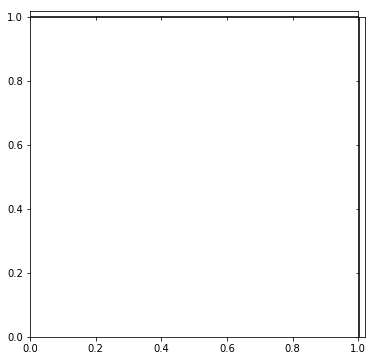

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
 
grid = sns.JointGrid(kbest, acc, space=0, size=6, ratio=50)
grid.plot_joint(plt.bar, color="g")
plt.plot([min(kbest), max(kbest)], [baseline, baseline], linewidth=2)

## Utilizando joblib

In [ ]:
!pip install joblib

In [ ]:
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled, y_train)

persistence = {}
persistence['scaler'] = scaler
persistence['model']  = model

dump(persistence, 'persist.joblib')

In [ ]:
persistence = load('persist.joblib')

scaler = persistence['scaler']
model = persistence['model']

X_test_scaled = scaler.transform(X_test)

y_pred = model.predict(X_test_kbest)

print('Acurácia:', accuracy_score(y_test, y_pred))

## Agrupamento

In [ ]:
# construção de alguns conjuntos artificiais

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

In [ ]:
# agrupamento por k-medias
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, kmeans_dataset1, kmeans_dataset2)

In [ ]:
# sensível a densidade, o que acontece em diminuir as amostras?

kmeans_dataset3 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset4 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset3, kmeans_dataset4,title1='', title2='')

In [ ]:
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

In [ ]:
hc_dataset3 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset3_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)
cluster_plots(dataset2, dataset2, hc_dataset3, hc_dataset3_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

In [ ]:
# classificacao com KMeans

from sklearn.datasets import load_digits, load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

def clust(dataset_load, n_clusters):

    ds = dataset_load()
    X = ds.data
    y = ds.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    print('Sem clustering:', model.score(X_test, y_test))

    km = KMeans(n_clusters = n_clusters, random_state=42)
    X_train = km.fit_transform(X_train)
    X_test  = km.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(X_train, y_train)
    print('Com clustering:', model.score(X_test, y_test))
    

print('Digits dataset')
clust(load_digits, n_clusters = 3)
print()
print('Iris dataset')
clust(load_iris, n_clusters = 2)


## Exercícios

1. Explore a utilização do PCA e do SelectKBest dentro do Pipeline para simplificar a aplicação.